In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
# Import the data
df = pd.read_csv("C:/Users/z011348/Desktop/ML/input/titanic/train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
# Make a copy of original dataframe - for future reference
df_tmp = df.copy()

In [50]:
# There are some column data is not needed for predictions. So we will delete them from Dataframe
df_tmp.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
df_tmp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [52]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

In [53]:
df_tmp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
dtype: object

In [54]:
# Fill missing age values with median
df_tmp['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

In [55]:
# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_tmp['Cabin'].fillna('U', inplace=True)
df_tmp["Cabin"] = df_tmp["Cabin"].astype('category')
df_tmp["Cabin"] = df_tmp["Cabin"].cat.codes
df_tmp.head(15)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,147
1,2,1,1,38.0,1,0,71.2833,81
2,3,1,3,26.0,0,0,7.9250,147
3,4,1,1,35.0,1,0,53.1000,55
4,5,0,3,35.0,0,0,8.0500,147
5,6,0,3,28.0,0,0,8.4583,147
6,7,0,1,54.0,0,0,51.8625,129
7,8,0,3,2.0,3,1,21.0750,147
8,9,1,3,27.0,0,2,11.1333,147
9,10,1,2,14.0,1,0,30.0708,147


In [64]:
# Processed dataframe 
df_tmp.head(8)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,147
1,2,1,1,38.0,1,0,71.2833,81
2,3,1,3,26.0,0,0,7.9250,147
3,4,1,1,35.0,1,0,53.1000,55
4,5,0,3,35.0,0,0,8.0500,147
5,6,0,3,28.0,0,0,8.4583,147
6,7,0,1,54.0,0,0,51.8625,129
7,8,0,3,2.0,3,1,21.0750,147


In [58]:
# Check for nulls again
print(df_tmp.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
dtype: int64


In [65]:
# Split into X and y (on train set)
X_train = df_tmp.drop("Survived", axis=1)
y_train = df_tmp["Survived"]
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,3,22.0,1,0,7.2500,147
1,2,1,38.0,1,0,71.2833,81
2,3,3,26.0,0,0,7.9250,147
3,4,1,35.0,1,0,53.1000,55
4,5,3,35.0,0,0,8.0500,147


In [66]:
# -------------------------------------------------
# Process test data set
# -------------------------------------------------
# import test set
df_test = pd.read_csv("C:/Users/z011348/Desktop/ML/input/titanic/test.csv")
df_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

# Fill missing age values with median
df_test['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_test['Cabin'].fillna('U', inplace=True)
df_test["Cabin"] = df_test["Cabin"].astype('category')
df_test["Cabin"] = df_test["Cabin"].cat.codes

# Fill missing Fare values with median
df_test['Fare'].replace(np.NaN, df_tmp['Fare'].median(), inplace=True)

print(df_test.isna().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
dtype: int64


In [61]:
# Find the column differences b/w training and test data sets
print("Find the column differences b/w training and test data sets:")
print(set(df_test.columns) - set(X_train.columns)) 
print("")

Find the column differences b/w training and test data sets:
set()



In [67]:
# -----------------------------------------
# Model RandomForestClassifier
# -----------------------------------------
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
print(f"Model(RandomForestClassifier) score: ", model.score(X_train, y_train))
print("")


Model(RandomForestClassifier) score:  1.0



In [98]:
# Let's dp the prediction on X_train data set to see all predictions
print("========= Predicted Survived ============ ")
test_pred = model.predict(X_train)
#print(len(test_pred))
print(test_pred)
print("")

# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, test_pred))
print(" ")

# visualize confusion matrix with pd.crosstab()
df = pd.crosstab(y_train,
                 test_pred,
                 rownames=["Actual labels"],
                 colnames=["Predicted labels"])
print(df)

========= Predicted Survived ============ 
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 

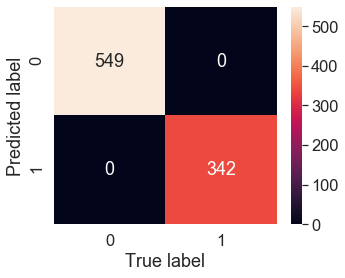

In [95]:
# import matplotlib
import matplotlib.pyplot as plt
# Make our prediction more visualize with seaborn heatmap()
import seaborn as sns
# Set the font scale 
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.heatmap(confusion_matrix(y_train, test_pred),
                annot=True,    # annotate the boxes with conf_mat info
                cbar=True,
                fmt='g')
    
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [96]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [99]:
# Lets do prediction test set (as per requirement)
print("========= Predicted Survived ============ ")
test_pred = model.predict(df_test)
#print(len(test_pred))
print(test_pred)
print("")

========= Predicted Survived ============ 
[0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 1]



In [101]:
# Now we need to format as per the requirement
df_prediction_survived = pd.DataFrame()
df_prediction_survived["PassengerId"] = df_test["PassengerId"]
df_prediction_survived["Survived"] = test_pred
print(df_prediction_survived)

# Save the prediction results in the csv file
df_prediction_survived.to_csv("C:/Users/z011348/Desktop/ML/output/titanic/Survived_classification_prediction_2.csv",
                               index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         0
416         1308         1
417         1309         1

[418 rows x 2 columns]
